In [ ]:
# Read in data from Des Moines housing market

# Polk county assessors (PCA) residential housing data reference
# http://web.assess.co.polk.ia.us/web/exports/basic/res.html  

# According to PCA site, housing data is geographically grouped by 
# Jurisdiction (Des Moines, Johnston, West Des Moines, Grimes, Ankeny, Polk city, etc.)

# Within Des Moines, the data is broken down into tax districts
# http://web.assess.co.polk.ia.us/cgi-bin/web/maps/map.cgi?map=taxdist&img.x=340&img.y=220&zoom=2&&imgext=1535650+519817+1648201+632368
    
    




# Downtown Tax Districts
Within Des Moines, the residential housing units can be grouped by is broken down into tax districts

http://web.assess.co.polk.ia.us/cgi-bin/web/maps/map.cgi?map=taxdist&img.x=340&img.y=220&zoom=2&&imgext=1535650+519817+1648201+632368


Downtown des moines consists of groups 020,030,040.  

![title](images/TAXDIST-downtown.png)


And our area of specific interest is district 040.

![title](images/TAXDIST-040.png)


In [ ]:
# download the data

# all sales by year and then jurisdiction
# http://web.assess.co.polk.ia.us/web/exports/basic/res.html

# request data of condos 
#http://web.assess.co.polk.ia.us/cgi-bin/web/tt/form.cgi?tt=rsaleformCU

# An attempt to get all condos from 020,030,040 for all time is downloaded to:
# data/condos-020-030-040-allyears.xls
    

In [17]:
!pip install urlextract
!pip install requests
!pip install furl

You should consider upgrading via the 'c:\users\user2\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user2\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [439]:
from urlextract import URLExtract
import requests
from furl import furl

# geoparcel url (gp)
url = "http://web.assess.co.polk.ia.us/cgi-bin/web/maps/googlemap/04000614005000"

# request geoparcel url
req = requests.get(url)
text = req.text
print("Response is: {}\n".format(text))

# extract url from redirect response
extractor = URLExtract()
urls = extractor.find_urls(text)
print(urls[0]) # prints: ['example.com']

# get raw coords from url
f = furl(urls[0]) 
coords = f.args['q']
print(coords)


Response is: <html><head><meta HTTP-EQUIV="REFRESH" content="0; url=http://maps.google.com/maps?q=41.5896426676162,-93.6107644172155&t=h&z=18"></head><body>Redirecting to <a href="http://maps.google.com/maps?q=41.5896426676162,-93.6107644172155&t=h&z=18">Google</a></body></html>

http://maps.google.com/maps?q=41.5896426676162,-93.6107644172155&t=h&z=18
41.5896426676162,-93.6107644172155


In [3]:
!pip install wget

You should consider upgrading via the 'c:\users\user2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
%%time
# download all the files for DM jurisdiction
import wget

from datetime import date

min_year = 1987
max_year = date.today().year
# base url with the year as a placeholder
base_url = "http://web.assess.co.polk.ia.us/web/exports/res/sales/{}/DM.txt"
# base name
base_name = "DM-{}.csv"

for year in range(min_year,max_year+1):
    url = base_url.format(year)
    name = base_name.format(year)
    path = "./data/{}".format(name)
    if os.path.exists(path):
        os.remove(path) 
    wget.download(url,path)
# list of csv location by year
# urls = list(map(lambda x: base_url.format(x), range(min_year,max_year+1)))
# for url in urls:
#     wget.download(url, "/data/{}".format(base_name.format()))

100% [..........................................................................] 1674706 / 1674706Wall time: 1min 37s


In [49]:
%%time
# read real estate from the downloaded files
# download the files first
# this takes about 1.5secs

import pandas as pd
from datetime import date

min_year = 1987
max_year = date.today().year
# base url with the year as a placeholder
base_url = "./data/DM-{}.csv"

# list of csv location by year
urls = list(map(lambda x: base_url.format(x), range(min_year,max_year+1)))
# this took 1min 30s
# read in all the tab delimited csv's into a dataframe
df = pd.concat((pd.read_csv(url, sep="\t") for url in urls))

df.shape

Wall time: 1.52 s


(159877, 75)

In [11]:
# don't use this cell!! For example/reference purpose only
# read real estate data from the urls
# this taks about 1min30sec

# output the total execution time
%%time

# Load a single year into a pandas dataframe
import pandas as pd
from datetime import date

min_year = 1987
max_year = date.today().year
# base url with the year as a placeholder
base_url = "http://web.assess.co.polk.ia.us/web/exports/res/sales/{}/DM.txt"

# list of csv location by year
urls = list(map(lambda x: base_url.format(x), range(min_year,max_year+1)))

# this took 1min 30s
# read in all the tab delimited csv's into a dataframe
df = pd.concat((pd.read_csv(url, sep="\t") for url in urls))

# output the rows and columns 
df.shape

# rows 159819
# cols 75

Wall time: 1min 30s


(159819, 75)

In [15]:
# export the whole dataframe to a combined csv
combined_file = "./data/DM-all-years.csv"
# delete if exists
if os.path.exists(combined_file):
    os.remove(combined_file) 
# export to csv
df.to_csv(combined_file)

In [51]:
%%time

# http://web.assess.co.polk.ia.us/web/exports/resA/sales/2020.txt
# download all the files for all POLK
# takes about 1min30secs
import wget

from datetime import date

min_year = 1990
max_year = date.today().year
# base url with the year as a placeholder
# base_url = "http://web.assess.co.polk.ia.us/web/exports/res/sales/{}/DM.txt"
base_url = "http://web.assess.co.polk.ia.us/web/exports/resA/sales/{}.txt"
# base name
base_name = "POLK-{}.csv"

for year in range(min_year,max_year+1):
    url = base_url.format(year)
    name = base_name.format(year)
    path = "./data/{}".format(name)
    if os.path.exists(path):
        os.remove(path) 
    wget.download(url,path)

100% [..........................................................................] 4296536 / 4296536Wall time: 1min 31s


In [52]:
%%time
# read real estate from the downloaded files
# download the files first
# this takes about 1.5secs

import pandas as pd
from datetime import date

min_year = 1990
max_year = date.today().year
# base url with the year as a placeholder
base_url = "./data/POLK-{}.csv"

# list of csv location by year
urls = list(map(lambda x: base_url.format(x), range(min_year,max_year+1)))
# this took 1min 30s
# read in all the tab delimited csv's into a dataframe
df = pd.concat((pd.read_csv(url, sep="\t") for url in urls))

df.shape

C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DtypeWarning: Columns (74) have mixed types.Specify dtype option on import or set low_memory=False.
C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DtypeWarning: Columns (67,74) have mixed types.Specify dtype option on import or set low_memory=False.
C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 3.1 s


(337932, 75)

In [53]:
# export the whole dataframe to a combined csv
combined_file = "./data/POLK-all-years.csv"
# delete if exists
if os.path.exists(combined_file):
    os.remove(combined_file) 
# export to csv
df.to_csv(combined_file)

In [225]:
# install, import, and update cpi library
!pip install cpi
import cpi
cpi.update

You should consider upgrading via the 'c:\users\user2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [227]:
import cpi
cpi.update

<function cpi.update()>

In [277]:
def inflate_column(data, price, year):
    """
    Adjust for inflation the series of values in column of the   
    dataframe data
    """
    return data.apply(lambda x: cpi.inflate(x[price], 
                      x[year]), axis=1)

In [278]:
del df['price-adj']

KeyError: 'price-adj'

In [259]:
# df_2020 = df[df.year_built == 2020]
# df_need_adj = df[df.year_built < 2020]

# print("Total: {}".format(df.shape[0]))
# print("2020: {}".format(df_2020.shape[0]))
# print("need adj: {}".format(df_need_adj.shape[0]))
# print("sum of 2020 and need adj: {}".format((df_need_adj.shape[0]+df_2020.shape[0]+df['year_built'].isnull().sum())))

# print(df['year_built'].isnull().sum())

Total: 337932
2020: 142
need adj: 289495
sum of 2020 and need adj: 337932
48295


In [253]:
# df["price-adj"] = df.price
# df["price-adj"] = inflate_column(df,'price','year_built')

#adjust the worldwide gross profits
# movies_df['real_worldwide_gross'] = inflate_column(movies_df, 'worldwide_gross')

IndexError: index 2020 is out of bounds for axis 0 with size 76

In [11]:
%matplotlib inline
import matplotlib.pyplot as pt
import numpy as np
import os

In [70]:
df.columns
# df["nbhd"]

df_year = df["year_built"].median(skipna=True)
print(df_year)

total = df["year_built"].count()
print(total)

# uniqs1 = df.nbhd.unique()
# print(uniqs1)

# dm_and_wdm_df = df[df['nbhd'].str.contains("DM|WD")]

# uniqs2 = dm_and_wdm_df.nbhd.unique()
# print(uniqs2)

df["main_nbhd"] = df.nbhd.str[:2]

uniqs3 = df.main_nbhd.unique()
print(uniqs3)

# unique_jurisdictions = set()
# for jurisdiction in uniqs1:
#     unique_jurisdictions.add(jurisdiction[:2])
    


1971.0
289637
['AK' 'AM' 'AN' 'AT' 'BL' 'BN' 'BV' 'CA' 'CR' 'CV' 'CY' 'DE' 'DG' 'DM'
 'EK' 'ET' 'FM' 'FR' 'GR' 'JE' 'JH' 'LN' 'MA' 'MT' 'PC' 'PH' 'RU' 'SA'
 'SH' 'UN' 'UR' 'WA' 'WD' 'WE' 'WH' 'WT' 'CS' 'GA']


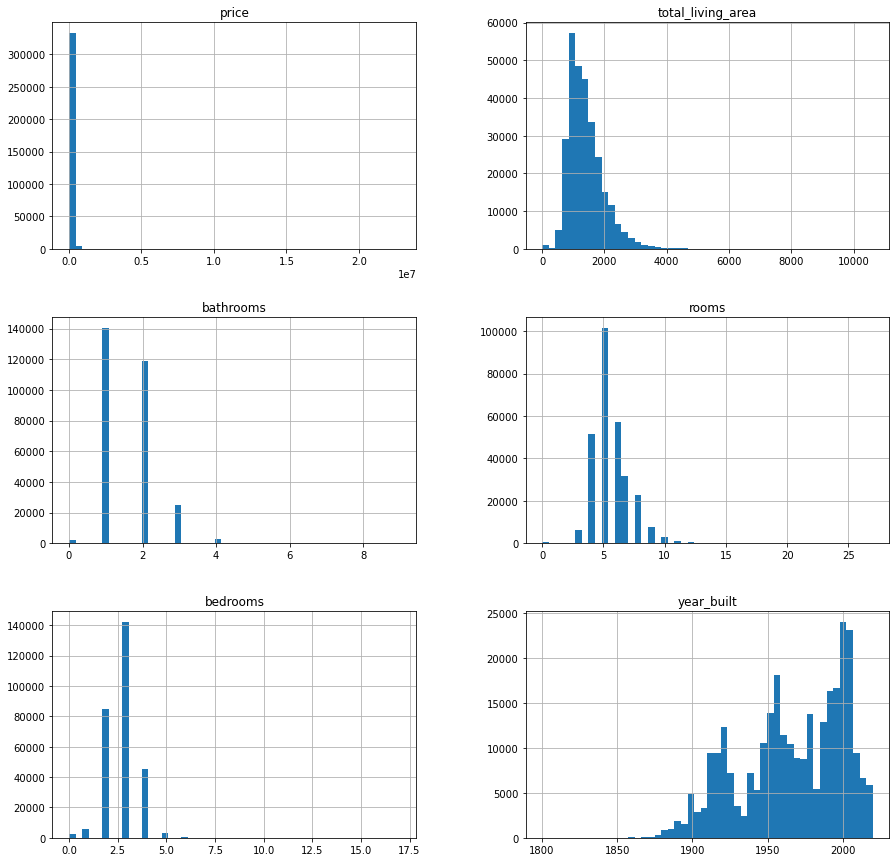

<bound method NDFrame.head of        price  total_living_area  bathrooms  rooms  bedrooms  year_built  nbhd
0     103360                NaN        NaN    NaN       NaN         NaN  AK02
1     350000                NaN        NaN    NaN       NaN         NaN  AK01
2     200000                NaN        NaN    NaN       NaN         NaN  AK01
3       5160                NaN        NaN    NaN       NaN         NaN  AK02
4      11000                NaN        NaN    NaN       NaN         NaN  AK02
...      ...                ...        ...    ...       ...         ...   ...
9667  140000             1423.0        1.0    5.0       3.0      1957.0  WH01
9668  135500             1760.0        2.0    6.0       2.0      1975.0  WHT1
9669  158000             1760.0        2.0    6.0       3.0      1977.0  WHT1
9670  130000             1670.0        1.0    5.0       3.0      1977.0  WHT1
9671  134500             1760.0        2.0    5.0       3.0      1978.0  WHT1

[337932 rows x 7 columns]>

In [224]:



# df.hist(bins=50, figsize=(15,15))
# plt.show()


df2 = df[['price','total_living_area', 'bathrooms','rooms','bedrooms','year_built',"nbhd"]].copy()
df2.hist(bins=50, figsize=(15,15))
plt.show()

df2.head


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337932 entries, 0 to 9671
Data columns (total 76 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   jurisdiction        337932 non-null  object 
 1   nbhd                337932 non-null  object 
 2   dp                  337932 non-null  int64  
 3   gp                  336162 non-null  float64
 4   sale_date           337932 non-null  object 
 5   book                337932 non-null  int64  
 6   pg                  337932 non-null  int64  
 7   instrument          337932 non-null  object 
 8   price               337932 non-null  int64  
 9   address             334987 non-null  object 
 10  zip                 333741 non-null  float64
 11  seller              337932 non-null  object 
 12  buyer               337932 non-null  object 
 13  land_full           337929 non-null  float64
 14  bldg_full           337920 non-null  float64
 15  total_full          337927 non-null 

In [77]:
# pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows',100)
# df.info(verbose=True)
df.isnull().sum()

jurisdiction               0
nbhd                       0
dp                         0
gp                      1770
sale_date                  0
book                       0
pg                         0
instrument                 0
price                      0
address                 2945
zip                     4191
seller                     0
buyer                      0
land_full                  3
bldg_full                 12
total_full                 5
quality1                   0
quality2                   0
included_dps          323301
land_sf                 6005
land_acres              6005
occupancy              48160
residence_type         48163
bldg_style             88751
exterior_wall_type     50016
percent_brick          47920
roof_type              54709
roof_material          50014
main_living_area       47920
upper_living_area      47921
fin_attic_area         47932
total_living_area      47920
unfin_attic_area       47921
foundation             49491
basement_area 

In [78]:
df['bedrooms'].value_counts()

3.0     142112
2.0      84681
4.0      45531
1.0       5965
5.0       3363
0.0       2637
6.0        849
7.0         91
8.0         36
9.0         14
15.0         1
17.0         1
Name: bedrooms, dtype: int64

In [80]:
import numpy as np # linear algebra
# import pandas as pd # datapreprocessing, CSV file I/O
# import seaborn as sns # for plotting graphs
import matplotlib.pyplot as plt

C:\Users\user2\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


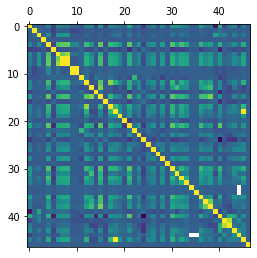

In [84]:
# def correlation_heatmap(df1):
#     _,ax=plt.subplots(figsize=(15,10))
#     colormap=sns.diverging_palette(220,10,as_cmap=True)
#     sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
# df2.info
# correlation_heatmap(df2)

plt.matshow(df.corr())
plt.show()

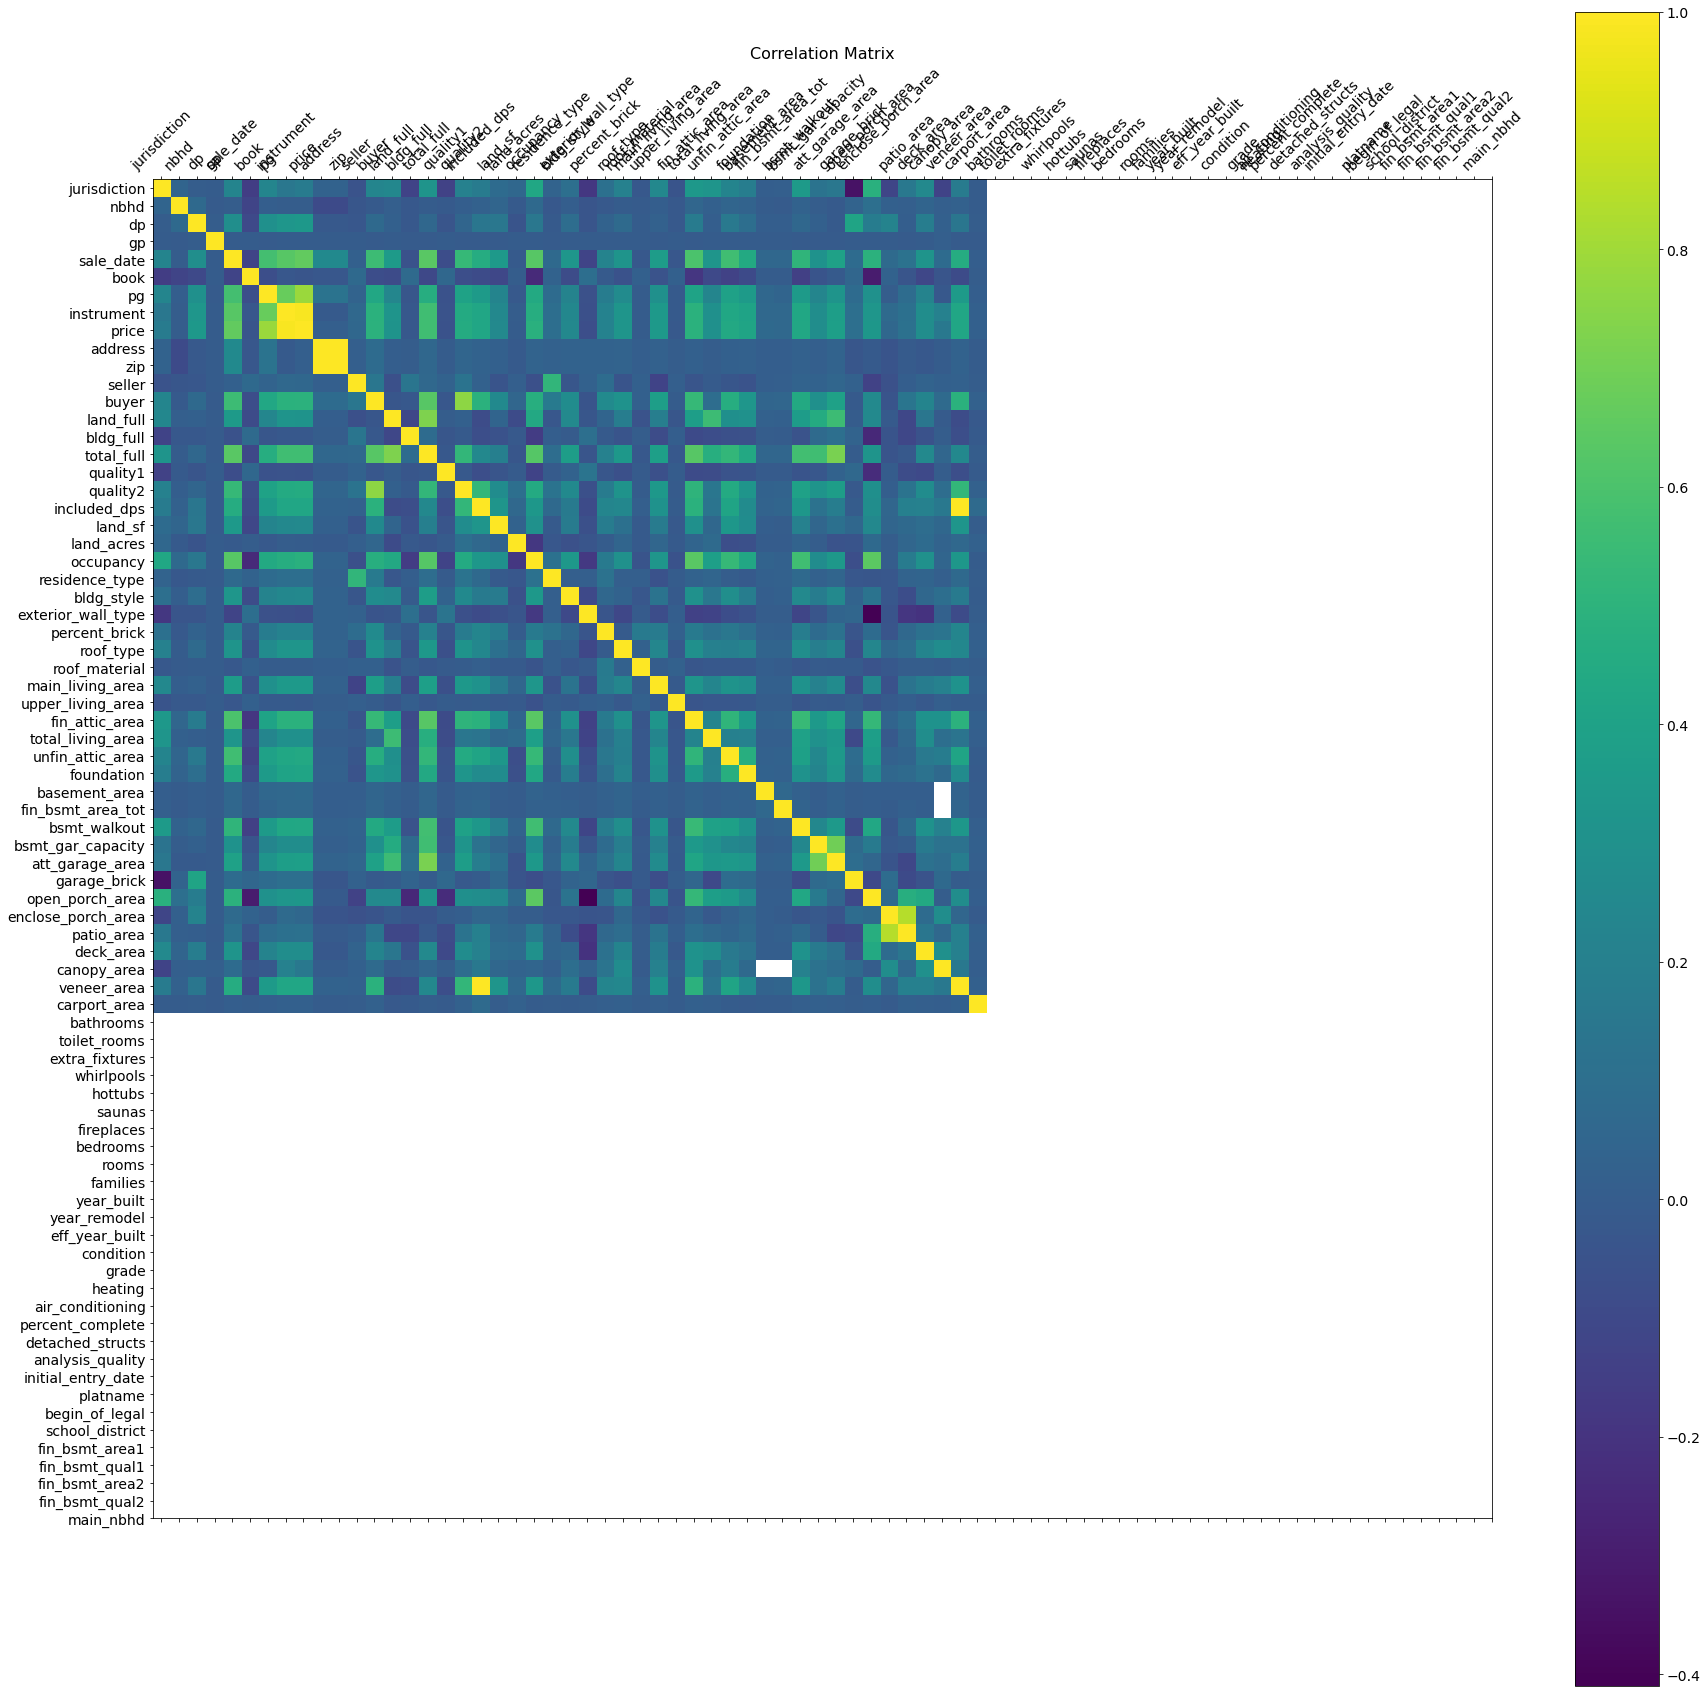

In [88]:
f = plt.figure(figsize=(30, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix',fontsize=16);

In [91]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,dp,gp,book,pg,price,zip,land_full,bldg_full,total_full,land_sf,land_acres,percent_brick,main_living_area,upper_living_area,fin_attic_area,total_living_area,unfin_attic_area,basement_area,fin_bsmt_area_tot,bsmt_walkout,bsmt_gar_capacity,att_garage_area,garage_brick,open_porch_area,enclose_porch_area,patio_area,deck_area,canopy_area,veneer_area,carport_area,bathrooms,toilet_rooms,extra_fixtures,whirlpools,hottubs,saunas,fireplaces,bedrooms,rooms,families,year_built,year_remodel,eff_year_built,air_conditioning,percent_complete,fin_bsmt_area1,fin_bsmt_area2
dp,1.00,0.04,0.00,-0.00,0.23,-0.15,0.23,0.15,0.18,0.03,0.03,-0.05,0.23,0.24,-0.13,0.32,-0.13,0.21,0.18,0.08,0.06,0.43,0.04,0.10,-0.18,0.11,0.21,-0.02,0.25,-0.04,0.34,0.32,0.23,0.19,0.01,0.01,0.36,0.12,0.15,-0.34,0.49,-0.11,0.16,0.26,-0.12,0.18,0.00
gp,0.04,1.00,0.07,-0.00,0.00,-0.12,0.01,0.01,0.01,-0.09,-0.09,-0.03,-0.01,0.02,-0.02,0.00,-0.01,0.01,0.03,0.05,-0.01,0.07,-0.02,0.01,-0.04,-0.01,0.00,-0.01,0.01,-0.01,0.05,0.02,0.05,0.04,-0.00,-0.00,0.03,0.01,-0.01,0.04,0.10,0.02,0.01,0.04,0.02,0.03,0.00
book,0.00,0.07,1.00,0.00,0.29,-0.10,0.30,0.33,0.34,-0.02,-0.02,-0.03,0.07,0.02,-0.02,0.06,-0.04,0.05,0.14,0.15,-0.04,0.15,-0.01,0.10,-0.04,0.03,0.08,0.00,0.03,-0.01,0.18,0.01,0.16,0.10,0.01,0.01,0.06,0.02,-0.01,0.41,0.18,0.22,0.01,0.19,0.02,0.14,0.00
pg,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,0.02,-0.00,-0.00
price,0.23,0.00,0.29,-0.00,1.00,-0.12,0.58,0.64,0.66,0.26,0.26,0.02,0.56,0.36,-0.06,0.64,-0.08,0.54,0.46,0.35,-0.01,0.64,0.07,0.33,-0.12,0.22,0.32,-0.02,0.37,-0.03,0.60,0.33,0.57,0.45,0.06,0.06,0.51,0.31,0.40,0.09,0.50,0.08,0.12,0.32,0.08,0.46,0.01
zip,-0.15,-0.12,-0.10,-0.00,-0.12,1.00,-0.07,-0.03,-0.04,-0.03,-0.03,0.07,-0.08,-0.09,0.08,-0.10,0.06,-0.07,-0.09,-0.11,0.01,-0.24,0.03,-0.08,0.10,-0.01,-0.06,0.02,-0.05,0.02,-0.19,-0.10,-0.13,-0.10,-0.00,0.00,-0.14,-0.04,-0.01,0.06,-0.30,0.04,-0.04,-0.11,-0.04,-0.09,0.00
land_full,0.23,0.01,0.30,-0.00,0.58,-0.07,1.00,0.67,0.79,0.13,0.13,0.04,0.44,0.24,-0.03,0.47,-0.06,0.40,0.36,0.23,-0.02,0.44,0.08,0.22,-0.06,0.18,0.27,-0.00,0.30,-0.01,0.41,0.23,0.40,0.36,0.06,0.04,0.36,0.23,0.32,0.08,0.30,0.01,0.09,0.22,-0.02,0.36,0.01
bldg_full,0.15,0.01,0.33,-0.00,0.64,-0.03,0.67,1.00,0.98,-0.01,-0.01,0.06,0.49,0.32,-0.02,0.57,-0.05,0.45,0.42,0.25,0.01,0.47,0.10,0.24,-0.07,0.21,0.33,0.00,0.35,-0.01,0.49,0.30,0.43,0.41,0.07,0.07,0.43,0.28,0.38,0.11,0.33,0.07,0.11,0.28,0.21,0.42,0.02
total_full,0.18,0.01,0.34,-0.00,0.66,-0.04,0.79,0.98,1.00,0.02,0.02,0.06,0.50,0.31,-0.02,0.57,-0.05,0.46,0.43,0.25,0.00,0.48,0.10,0.25,-0.07,0.22,0.33,0.00,0.35,-0.01,0.49,0.30,0.44,0.41,0.07,0.07,0.43,0.28,0.38,0.11,0.34,0.06,0.11,0.28,0.16,0.43,0.02
land_sf,0.03,-0.09,-0.02,0.00,0.26,-0.03,0.13,-0.01,0.02,1.00,1.00,0.02,0.08,0.01,0.00,0.06,-0.00,0.05,0.03,0.02,-0.01,0.04,0.03,0.04,0.03,0.03,0.04,0.01,0.03,0.00,0.02,0.00,0.02,0.03,0.01,0.01,0.03,0.02,0.04,-0.03,-0.01,-0.04,-0.01,-0.02,-0.00,0.03,0.00


In [284]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline








In [367]:
# df3 = df[['price','total_living_area', 'bathrooms','rooms','bedrooms','year_built',"nbhd"]].copy()
# df3 = df[['price','total_living_area', 'bathrooms','rooms','bedrooms','year_built','sale_date']].copy()
df3 = df[['price','land_full','bldg_full','total_full','main_living_area',
          'total_living_area','basement_area','att_garage_area','bathrooms',
          'extra_fixtures','fireplaces','year_built','sale_date']].copy()
pd.set_option('display.max_rows',100)
# df.info(verbose=True)
print(df3.isnull().sum())
print(df3.count())
print(df3.shape)
# (337932, 7)
# df3 = df3[df3['year_built'].notna()]
# df3 = df3[df3['year_built'].notna()]
df3.dropna(inplace=True)

# df3 = df3[df3['year_built'].notna()]
# df3 = df3[df3['rooms'].notna()]
# df3 = df3[df3['bedrooms'].notna()]

price                    0
land_full                3
bldg_full               12
total_full               5
main_living_area     47920
total_living_area    47920
basement_area        47926
att_garage_area      47927
bathrooms            47920
extra_fixtures       47920
fireplaces           47920
year_built           48295
sale_date                0
dtype: int64
price                337932
land_full            337929
bldg_full            337920
total_full           337927
main_living_area     290012
total_living_area    290012
basement_area        290006
att_garage_area      290005
bathrooms            290012
extra_fixtures       290012
fireplaces           290012
year_built           289637
sale_date            337932
dtype: int64
(337932, 13)


In [369]:
df3['sale_date'].dtypes
df3['sale_date'] =  pd.to_datetime(df3['sale_date'])
df3['sale_date'].dtypes
df3['sale_year'] = pd.DatetimeIndex(df3['sale_date']).year
# df['year'] = pd.DatetimeIndex(df['birth_date']).year
print(df3['sale_year'])

5       1990
7       1990
9       1990
11      1990
12      1990
        ... 
9667    2020
9668    2020
9669    2020
9670    2020
9671    2020
Name: sale_year, Length: 289619, dtype: int64


In [370]:
# df3.shape
print(df3.isna().sum())
print(df3.count())
print(df3.shape)
df3.info

price                0
land_full            0
bldg_full            0
total_full           0
main_living_area     0
total_living_area    0
basement_area        0
att_garage_area      0
bathrooms            0
extra_fixtures       0
fireplaces           0
year_built           0
sale_date            0
sale_year            0
dtype: int64
price                289619
land_full            289619
bldg_full            289619
total_full           289619
main_living_area     289619
total_living_area    289619
basement_area        289619
att_garage_area      289619
bathrooms            289619
extra_fixtures       289619
fireplaces           289619
year_built           289619
sale_date            289619
sale_year            289619
dtype: int64
(289619, 14)


<bound method DataFrame.info of        price  land_full  bldg_full  total_full  main_living_area  \
5     104000    21650.0    88500.0    110150.0            1868.0   
7      38900    15800.0    19930.0     35730.0             816.0   
9     200000    12450.0    36090.0     48540.0            1066.0   
11     43200    11220.0    29500.0     40720.0            1162.0   
12     41000    10660.0    26850.0     37510.0             672.0   
...      ...        ...        ...         ...               ...   
9667  140000    45400.0   152400.0    197800.0            1423.0   
9668  135500    20700.0    92200.0    112900.0             880.0   
9669  158000    20700.0    96200.0    116900.0             880.0   
9670  130000    21200.0    90400.0    111600.0             880.0   
9671  134500    20700.0    95600.0    116300.0             880.0   

      total_living_area  basement_area  att_garage_area  bathrooms  \
5                1868.0         1868.0              0.0        3.0   
7          

In [371]:
# with no nulls - adjust for cpi
df_2020 = df3[df3.sale_year == 2020]
df_need_adj = df3[df3.sale_year != 2020]
# df_test = df[df.sale_year != 2020]
print("Total: {}".format(df3.shape[0]))
print("2020: {}".format(df_2020.shape[0]))
print("need adj: {}".format(df_need_adj.shape[0]))
print("sum of 2020 and need adj: {}".format((df_need_adj.shape[0]+df_2020.shape[0]+df3['sale_year'].isnull().sum())))

print(df3['sale_year'].isnull().sum())



Total: 289619
2020: 8346
need adj: 281273
sum of 2020 and need adj: 289619
0


In [372]:
print ((df_need_adj == 2020).all(1))

5        False
7        False
9        False
11       False
12       False
         ...  
11906    False
11907    False
11908    False
11909    False
11910    False
Length: 281273, dtype: bool


In [373]:
df_need_adj.columns

Index(['price', 'land_full', 'bldg_full', 'total_full', 'main_living_area',
       'total_living_area', 'basement_area', 'att_garage_area', 'bathrooms',
       'extra_fixtures', 'fireplaces', 'year_built', 'sale_date', 'sale_year'],
      dtype='object')

In [374]:
# df["price-adj"] = df.price
# df_need_adj["price_adj"] = inflate_column(df_need_adj,'price','year_built')
# df['ADJUSTED'] = df.apply(lambda x: cpi.inflate(x.MEDIAN_HOUSEHOLD_INCOME, x.YEAR), axis=1)
# df_need_adj["price_adjusted"] = df_need_adj.apply(lambda x: cpi.inflate(x.price, x['sale_year']))
# print(df_need_adj["price"])
#adjust the worldwide gross profits
# movies_df['real_worldwide_gross'] = inflate_column(movies_df, 'worldwide_gross')

In [375]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [376]:
clean_dataset(df3)
df3 = df3.reset_index()

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [377]:
print(df3.isna().sum())
print(df3.count())
print(df3.shape)
df3.info


price                0
land_full            0
bldg_full            0
total_full           0
main_living_area     0
total_living_area    0
basement_area        0
att_garage_area      0
bathrooms            0
extra_fixtures       0
fireplaces           0
year_built           0
sale_date            0
sale_year            0
dtype: int64
price                289619
land_full            289619
bldg_full            289619
total_full           289619
main_living_area     289619
total_living_area    289619
basement_area        289619
att_garage_area      289619
bathrooms            289619
extra_fixtures       289619
fireplaces           289619
year_built           289619
sale_date            289619
sale_year            289619
dtype: int64
(289619, 14)


<bound method DataFrame.info of        price  land_full  bldg_full  total_full  main_living_area  \
5     104000    21650.0    88500.0    110150.0            1868.0   
7      38900    15800.0    19930.0     35730.0             816.0   
9     200000    12450.0    36090.0     48540.0            1066.0   
11     43200    11220.0    29500.0     40720.0            1162.0   
12     41000    10660.0    26850.0     37510.0             672.0   
...      ...        ...        ...         ...               ...   
9667  140000    45400.0   152400.0    197800.0            1423.0   
9668  135500    20700.0    92200.0    112900.0             880.0   
9669  158000    20700.0    96200.0    116900.0             880.0   
9670  130000    21200.0    90400.0    111600.0             880.0   
9671  134500    20700.0    95600.0    116300.0             880.0   

      total_living_area  basement_area  att_garage_area  bathrooms  \
5                1868.0         1868.0              0.0        3.0   
7          

In [378]:
# with no nulls - adjust for cpi
df_2020 = df3[df3.sale_year > 2018]
df_need_adj = df3[df3.sale_year < 2019]
print("Total: {}".format(df3.shape[0]))
print("2020: {}".format(df_2020.shape[0]))
print("need adj: {}".format(df_need_adj.shape[0]))
print("sum of 2020 and need adj: {}".format((df_need_adj.shape[0]+df_2020.shape[0]+df3['year_built'].isnull().sum())))

print(df3['year_built'].isnull().sum())

Total: 289619
2020: 19012
need adj: 270607
sum of 2020 and need adj: 289619
0


In [379]:
# df["price-adj"] = df.price
# cpi.inflate(100,2018)
df_need_adj["price_adj"] = inflate_column(df_need_adj,'price','sale_year')
# df_need_adj.to_csv("./data/test.csv")
# df['ADJUSTED'] = df.apply(lambda x: cpi.inflate(x.MEDIAN_HOUSEHOLD_INCOME, x.YEAR), axis=1)
# df3["price_adjusted"] = df3.apply(lambda x: cpi.inflate(x.price, x.year_built))
# print(df_need_adj["price"])
#adjust the worldwide gross profits
# movies_df['real_worldwide_gross'] = inflate_column(movies_df, 'worldwide_gross')

C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [380]:
print(df_need_adj["price_adj"].dtype)

df_need_adj["price_adj"] = df_need_adj["price_adj"].astype(np.int64)

print(df_need_adj["price_adj"].dtype)


float64
int64


C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [381]:
# combine and fill in the 2019,2020 values with non-adjusted price
df4 = pd.concat([df_need_adj,df_2020])
# df4.to_csv("./data/test.csv")
print(df4['price_adj'].isnull().sum())
print(df_2020.shape[0])
# df4['price_adj'].fillna(df4['price'])
df4.price_adj = df4.price_adj.fillna(value=df4.price)
print(df4['price_adj'].isnull().sum())
# finally replace our working object with the transformed object
df3 = df4

19012
19012
0


In [382]:
df3.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,price,land_full,bldg_full,total_full,main_living_area,total_living_area,basement_area,att_garage_area,bathrooms,extra_fixtures,fireplaces,year_built,sale_year,price_adj
price,1.00,0.73,0.76,0.78,0.56,0.64,0.54,0.64,0.60,0.57,0.51,0.50,0.36,0.96
land_full,0.73,1.00,0.78,0.85,0.44,0.47,0.40,0.45,0.41,0.40,0.36,0.30,0.37,0.67
bldg_full,0.76,0.78,1.00,0.99,0.49,0.57,0.45,0.47,0.49,0.43,0.43,0.33,0.38,0.69
total_full,0.78,0.85,0.99,1.00,0.50,0.57,0.46,0.48,0.49,0.44,0.43,0.34,0.39,0.71
main_living_area,0.56,0.44,0.49,0.50,1.00,0.63,0.76,0.47,0.53,0.47,0.45,0.25,0.07,0.59
total_living_area,0.64,0.47,0.57,0.57,0.63,1.00,0.52,0.63,0.63,0.52,0.57,0.32,0.06,0.69
basement_area,0.54,0.40,0.45,0.46,0.76,0.52,1.00,0.45,0.50,0.45,0.40,0.29,0.05,0.57
att_garage_area,0.64,0.45,0.47,0.48,0.47,0.63,0.45,1.00,0.64,0.54,0.57,0.64,0.15,0.65
bathrooms,0.60,0.41,0.49,0.49,0.53,0.63,0.50,0.64,1.00,0.51,0.54,0.53,0.17,0.61
extra_fixtures,0.57,0.40,0.43,0.44,0.47,0.52,0.45,0.54,0.51,1.00,0.39,0.36,0.16,0.56


In [389]:
train_data,test_data=train_test_split(df3,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['total_living_area']).reshape(-1,1)
y_train=np.array(train_data['price_adj']).reshape(-1,1)



In [390]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [391]:
x_test=np.array(test_data['total_living_area']).reshape(-1,1)
y_test=np.array(test_data['price_adj']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 96509.12
R squared training 0.491
R sqaured testing 0.447
intercept [-33462.24091466]
coefficient [[151.9304974]]


In [392]:
np.isnan(df3).any()
# np.isnan(df).any()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [214]:
y_test

array([[ 46000],
       [154000],
       [268000],
       ...,
       [200000],
       [  3000],
       [ 48500]], dtype=int64)

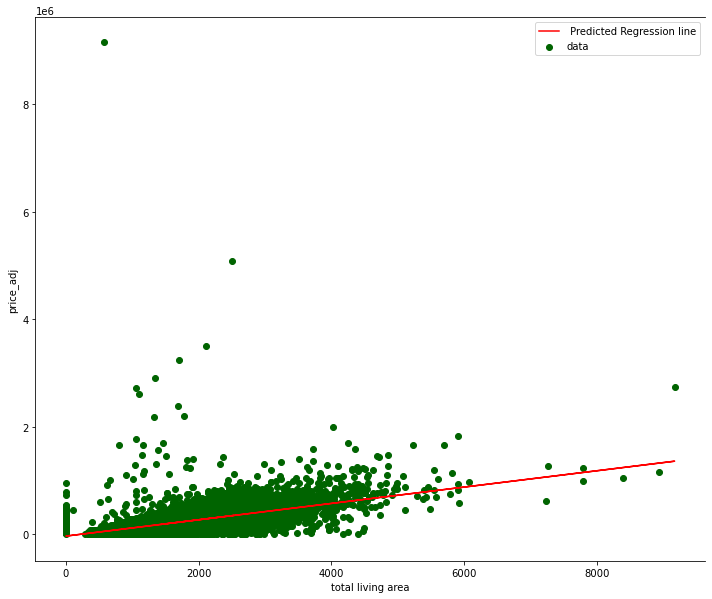

In [395]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('total living area')
plt.ylabel('price_adj')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [396]:
train_data,test_data=train_test_split(
df3,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['total_living_area']).reshape(-1,1)
t_train=np.array(train_data['price_adj']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['total_living_area']).reshape(-1,1)
y_test=np.array(test_data['price_adj']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)






linear model
squared mean error 96509.12
R squared training 0.491
R squared testing 0.447
intercept [-33462.24091466]
coefficient [[151.9304974]]


<AxesSubplot:xlabel='year_built', ylabel='price_adj'>

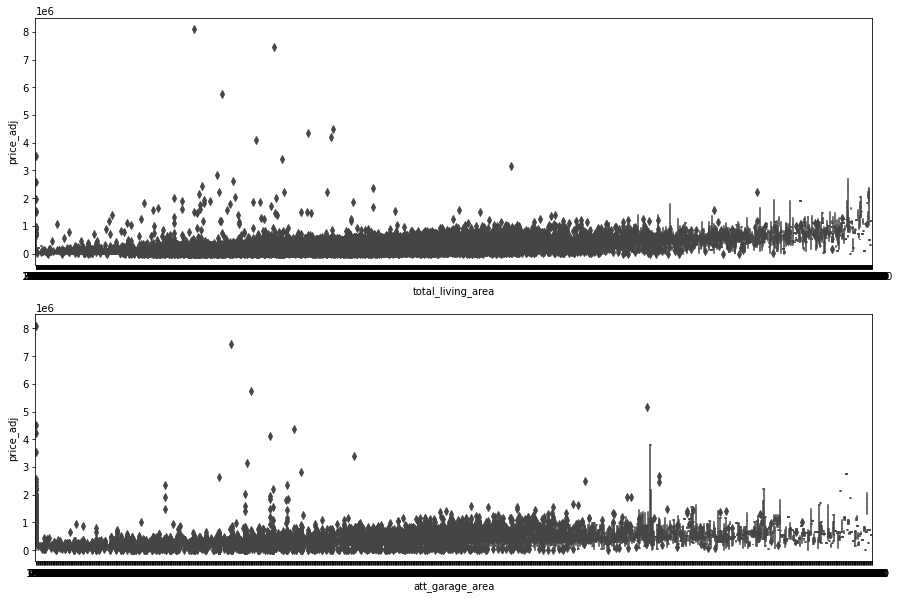

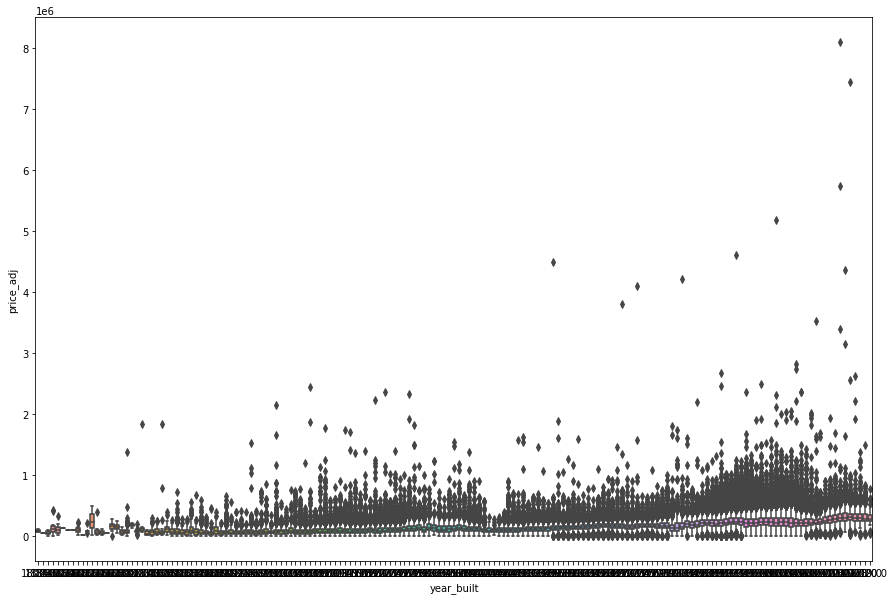

In [398]:

fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['total_living_area'],y=train_data['price_adj'],ax=ax[0])
sns.boxplot(x=train_data['att_garage_area'],y=train_data['price_adj'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['year_built'],y=train_data['price_adj'])


In [400]:
features1=['bathrooms','year_built','total_living_area','att_garage_area']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price_adj'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price_adj']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price_adj']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 86896.27
R squared training 0.602
R squared training 0.551
Intercept:  -1317935.3695905174
Coefficient: [19904.50883036   665.00989567    98.70728015    81.54490432]


In [401]:
features2 = ['bathrooms','year_built','total_living_area','att_garage_area','extra_fixtures','fireplaces','basement_area']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price_adj'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price_adj']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price_adj']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  86896.27
R-squared (training)  0.602
R-squared (testing)  0.551
Intercept:  -1317935.3695905174
Coefficient: [19904.50883036   665.00989567    98.70728015    81.54490432]


In [ ]:
# df[['price','land_full','bldg_full','total_full','main_living_area',
#           'total_living_area','basement_area','att_garage_area','bathrooms',
#           'extra_fixtures','fireplaces','year_built','sale_date']]

In [437]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price_adj'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price_adj'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price_adj']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price_adj']), 3))

Complex Model_3
Mean Squared Error (MSE)  83243.56
R-squared (training)  0.644
R-squared (testing)  0.588


In [438]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price_adj'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price_adj'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price_adj']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price_adj']), 3))

complex model_4
Mean Squared Error (MSE)  78697.99
R-squared (training)  0.698
R-squared (testing)  0.632
